In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

#Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
from code import tools as tl
from code.fbprophet import prophet_util as fp

Importing plotly failed. Interactive plots will not work.


#### Load and process data

In [4]:
###################

In [20]:
df = tl.load_data('./data/sample_data.csv') #read in data from file
df = tl.prepare_data(df,'Date', 'Weekly_Sales') # select 'ds' and 'y'
df.head()

,ds,y,IsHoliday
0,2010-05-02,24924.50,False
1,2010-12-02,46039.49,True
2,2010-02-19,41595.55,False
3,2010-02-26,19403.54,False
4,2010-05-03,21827.90,False


In [1]:
df1 = tl.group_by_date(df, 'D','2010-01-01','2012-12-31') # group by date
df1.shape

NameError: name 'tl' is not defined

In [22]:
df_tr, df_tst = tl.train_test_split(df1,'2011-12-31','2012-12-31')

train shape (24, 3)
test shape (12, 3)


In [ ]:
#######################

In [67]:
df = tl.load_data('./data/For Naomi.csv')
df = tl.prepare_data(df,'消費日期','交易筆數')

In [69]:
# period = 365, freq = 'D' , daily
# peroid = 12, freq = 'MS', monthly
freq = 'M'
period = 365

df1 = tl.group_by_date(df, freq, '2015-01-01', '2020-08-31') 

In [70]:
#df1.head()

,ds,消費金額,y
0,2015-01-01,127105351,90900
1,2015-02-01,164101848,105431
2,2015-03-01,129842426,85835
3,2015-04-01,151050924,94711
4,2015-05-01,154957932,104586


#### Split data for training and testing

In [71]:
df_tr, df_tst = tl.train_test_split(df1,'2017-12-31','2018-12-31')

train shape (36, 3)
test shape (12, 3)


### Model Training

In [72]:
prophet = fp.Prophet_Impl(df_tr,df_tst)

#### Hyperparmeter tuning

In [73]:
# Generate all combinations of parameters
params_grid = {'seasonality_mode':['multiplicative','additive'], 
               'changepoint_prior_scale': [0.001, 0.002, 0.005, 0.05, 0.5],  # default 0.05, reasonable range [0.001, 0.5]
               'seasonality_prior_scale': [0.01, 0.02, 0.05, 0.1, 1, 10.0],  # default 10, reasonable range [0.01, 10]
               'changepoint_range' : [0.8, 0.85, 0.9, 0.95] 
              }

all_params = fp.generate_all_params(params_grid)

Total Possible Models 240


In [74]:
'''
tuning data: '2018-01-01', '2018-12-31'
adjust period, freq for different prediction result,
ex: period = 365, freq = 'D', or peroid = 12, freq = 'MS'
'''
best_params, tuning_results = fp.hyperparam_tuning(all_params,df_tr, df_tst, 
                     '2018-01-01', '2018-12-31',period = period, freq = 'MS') 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

best parameters {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}
MAPE for monthly_revenue 0.07594391921455317


In [75]:
best_params

{'changepoint_prior_scale': 0.5,
 'changepoint_range': 0.9,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 0.1}

#### Use best parameters to train the model

In [76]:
df_tr, df_tst = tl.train_test_split(df1,'2018-12-31','2019-12-31')

train shape (48, 3)
test shape (12, 3)


In [77]:
prophet = fp.Prophet_Impl(df_tr,df_tst)

In [78]:
prophet.train(**best_params)
prophet.predict(period, freq)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [79]:
#prophet.forecast

#### Evaluatin of the result

In [80]:
df_pred = tl.slice_df(prophet.forecast,'2019-01-01', '2019-12-31', ['ds','yhat'])
tl.calc_mape(df_pred, df_tst, 'M','2019-01-01', '2019-12-31')

0.35955859074150104

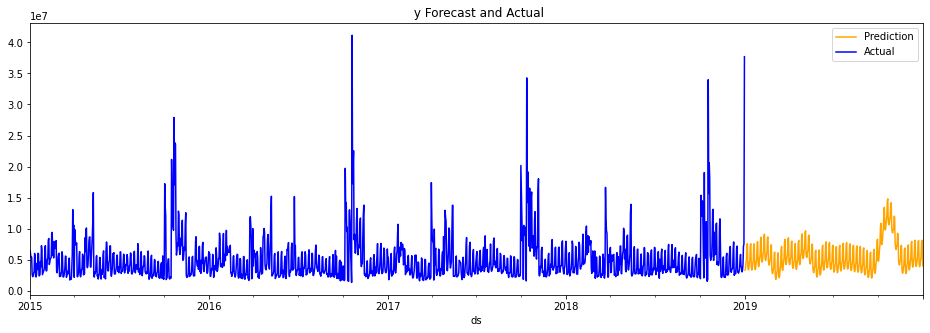

In [62]:
tl.plot_predict_and_actual(df_pred, df_tr)

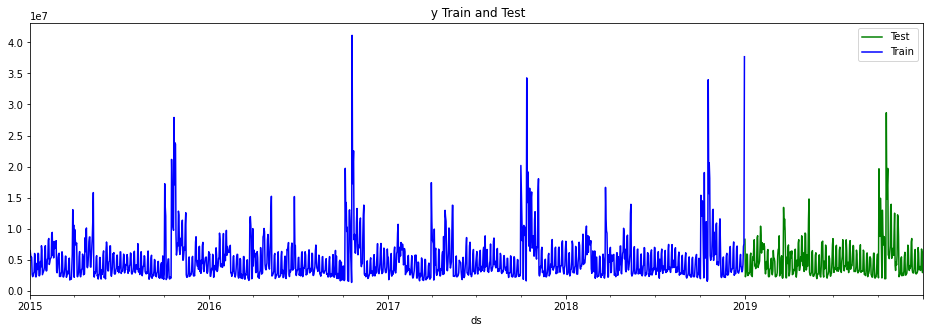

In [63]:
tl.plot_train_and_test(df_tst, df_tr)

(365, 2) (365, 3)


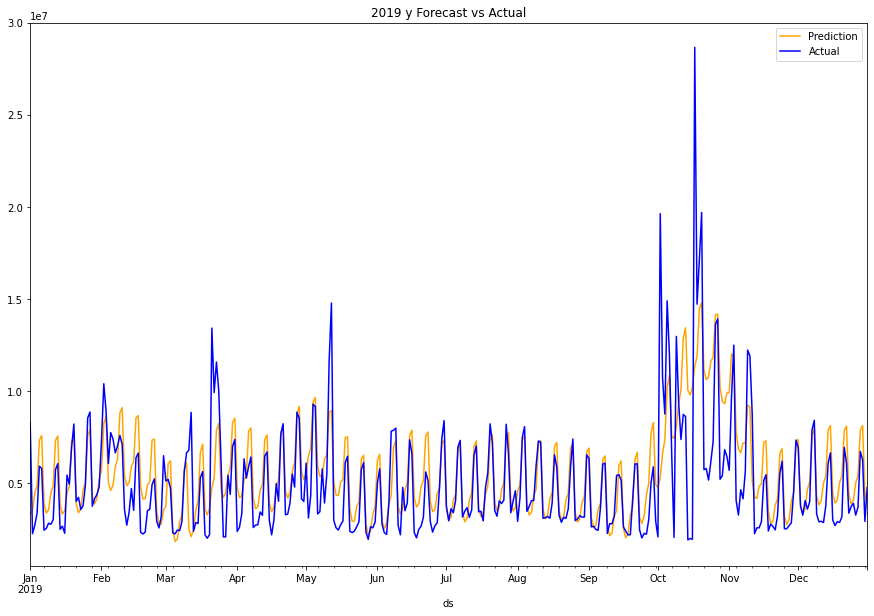

In [64]:
tl.plot_predict_vs_actual(df_pred, df_tst, freq, '2019-01-01', '2019-12-31')

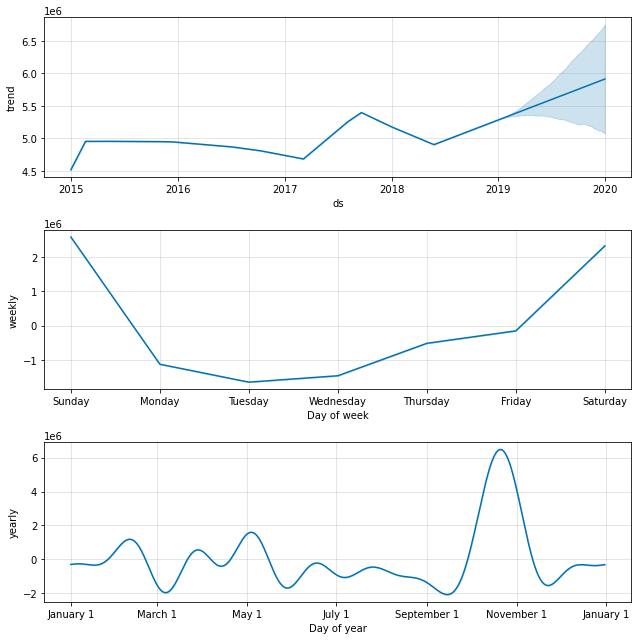

In [65]:
# Plot the components of the model
fig2=prophet.model.plot_components(prophet.forecast)

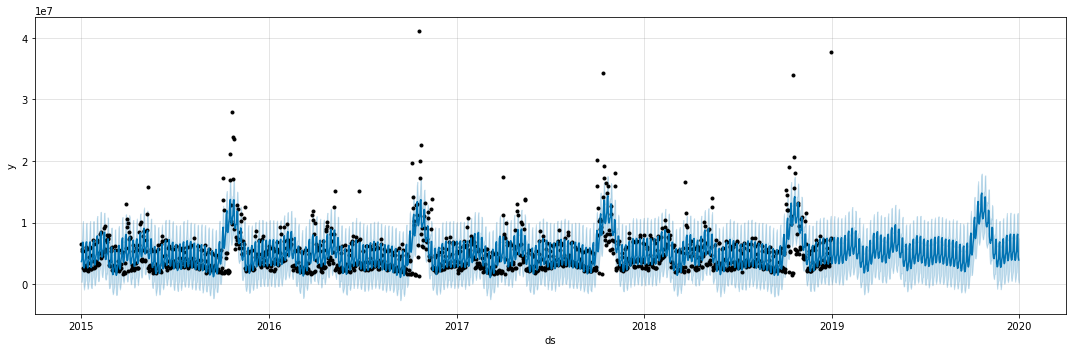

In [66]:
# Plot the forecast
fig, ax = plt.subplots(figsize=(15,5))
fig = prophet.model.plot(prophet.forecast,ax=ax)
plt.show()

In [60]:
tl.save_to_file(prophet.forecast, ['ds','yhat'],'test.csv' )